<a href="https://colab.research.google.com/github/AdenijiMujeeb/AdenijiMujeeb/blob/main/functions_M32082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install rpy2

In [72]:
import rpy2.ipython
# Activate the R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [73]:
%%R
# install and load the required packages
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
if (!requireNamespace("Hmisc", quietly = TRUE)) {
  install.packages("Hmisc")
}
if (!requireNamespace("corrplot", quietly = TRUE)) {
  install.packages("corrplot")
}
if (!requireNamespace("car", quietly = TRUE)) {
  install.packages("car")
}
if (!requireNamespace("lmtest", quietly = TRUE)) {
  install.packages("lmtest")
}
if (!requireNamespace("readxl", quietly = TRUE)) {
  install.packages("readxl")
}
library(ggplot2)
library(Hmisc)
library(corrplot)
library(car)
library(lmtest)
library(readxl)


In [74]:
# Import necessary modules
import os

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [75]:
%%R
# Function for generating the output path based on the task name
generate_output_path <- function(base_path, task_number) {
  task_name <- paste("task_", task_number, sep = "")
  output_path <- file.path(base_path, task_name)
  dir.create(output_path, showWarnings = FALSE, recursive = TRUE)
  return(output_path)
}

# Set the base path for all tasks
base_path <- "/content/drive/MyDrive/colab/output_result"

In [76]:
%%R
# read the dataset
data <- read.csv("/content/drive/MyDrive/colab/dataset/M32082_dataset.csv")

In [77]:
%%R
# checking for null values in the dataset
check_null_values <- colSums(is.na(data))
print(check_null_values)

              CustomerID                      Age            TypeofContact 
                       0                      226                        0 
                CityTier               Occupation                   Gender 
                       0                        0                        0 
  NumberOfPersonVisiting        NumberOfFollowups    PreferredPropertyStar 
                       0                       45                       26 
           MaritalStatus                 Passport   PitchSatisfactionScore 
                       0                        0                        0 
                  OwnCar NumberOfChildrenVisiting                   Income 
                       0                       66                      233 
           NumberOfTrips 
                     140 


In [78]:
%%R
# Check for duplicates in the "CustomerID" column
duplicates <- data$CustomerID[duplicated(data$CustomerID)]

# Check if there are any duplicates
if (length(duplicates) > 0) {
  print("Duplicate values found in CustomerID:")
  print(duplicates)
} else {
  print("No duplicate values found in CustomerID.")
}

[1] "No duplicate values found in CustomerID."


In [79]:
%%R
# Remove missing values from the data
df <- na.omit(data)
# print(df)

In [85]:
# @title Task-1
%%R
# Define a function for descriptive analysis
perform_descriptive_analysis <- function(dataframe, selected_variables, output_folder, table_name) {
  # Summary statistics and descriptive analysis for selected variables
  summary_data <- dataframe[, selected_variables]

  # Central tendencies (mean, median) and dispersion measures (standard deviation, range)
  central_dispersion_summary <- data.frame(
    Variable = colnames(summary_data),
    Mean = sapply(summary_data, mean, na.rm = TRUE),
    Median = sapply(summary_data, median, na.rm = TRUE),
    StdDev = sapply(summary_data, sd, na.rm = TRUE),
    Min = sapply(summary_data, min, na.rm = TRUE),
    Max = sapply(summary_data, max, na.rm = TRUE)
  )

  # Create histograms, box plots, and standard deviation plots for selected variables
  plots <- list()

  for (var in selected_variables) {
    # Create histogram
    hist_plot <- ggplot(dataframe, aes_string(x = var)) +
      geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
      labs(title = paste("Histogram of", var))

    # Create box plot
    box_plot <- ggplot(dataframe, aes_string(y = var)) +
      geom_boxplot(fill = "lightblue", color = "black") +
      labs(title = paste("Box Plot of", var))

    # Create standard deviation plot with error bars
    std_dev_plot <- ggplot(dataframe, aes_string(x = var, y = var)) +
      geom_errorbar(stat = "summary", fun.data = "mean_cl_normal", width = 0.2) +
      geom_point(stat = "summary", fun.data = "mean_sdl", position = position_nudge(x = 0.2)) +
      labs(title = paste("Standard Deviation of", var),
           x = var,
           y = "Value")

    plots[[var]] <- list(hist_plot, box_plot, std_dev_plot)
  }

  # Generate and save the plots as separate files in the specified output folder
  for (var in selected_variables) {
    pdf(file.path(output_folder, paste(var, "_histogram.pdf", sep = "")), width = 8, height = 6)
    print(plots[[var]][[1]])
    dev.off()

    pdf(file.path(output_folder, paste(var, "_boxplot.pdf", sep = "")), width = 8, height = 6)
    print(plots[[var]][[2]])
    dev.off()

    pdf(file.path(output_folder, paste(var, "_std_dev.pdf", sep = "")), width = 8, height = 6)
    print(plots[[var]][[3]])
    dev.off()
  }

  # Print the central tendencies and dispersion measures summary
  print(central_dispersion_summary)
  write.csv(central_dispersion_summary, file.path(output_folder, table_name))
}

In [87]:
%%R
# Specify the output folder
task_number <- 1
da_output_path <- generate_output_path(base_path, task_number)

# Define the selected variables for analysis
selected_variables <- c(
  "Age", "CityTier", "NumberOfPersonVisiting", "NumberOfFollowups","PreferredPropertyStar", "PitchSatisfactionScore", "NumberOfChildrenVisiting", "OwnCar", "Income", "NumberOfTrips"
  )
table_name = "central_dispersion_analysis.csv"
perform_descriptive_analysis(df, selected_variables, da_output_path, table_name)

                                         Variable         Mean Median
Age                                           Age 3.712564e+01     36
CityTier                                 CityTier 1.671649e+00      1
NumberOfPersonVisiting     NumberOfPersonVisiting 2.932275e+00      3
NumberOfFollowups               NumberOfFollowups 3.725596e+00      4
PreferredPropertyStar       PreferredPropertyStar 3.573564e+00      3
PitchSatisfactionScore     PitchSatisfactionScore 3.063288e+00      3
NumberOfChildrenVisiting NumberOfChildrenVisiting 1.209014e+00      1
OwnCar                                     OwnCar 6.153667e-01      1
Income                                     Income 2.305300e+04  22166
NumberOfTrips                       NumberOfTrips 3.270434e+00      3
                               StdDev  Min   Max
Age                         9.1390719   18    61
CityTier                    0.9241672    1     3
NumberOfPersonVisiting      0.7205009    1     5
NumberOfFollowups           1.0071

In [88]:
# @title Task-2
%%R
# Function for correlation analysis with output to a file
perform_correlation_analysis <- function(dataframe, variable_of_interest, output_folder) {
  # Drop the 'CustomerID' column if it exists
  if ("CustomerID" %in% colnames(dataframe)) {
    dataframe <- dataframe[, !colnames(dataframe) %in% "CustomerID"]
  }

  # Check if the variable of interest is numeric
  if (!is.numeric(dataframe[[variable_of_interest]])) {
    message("The variable of interest is not numeric. Skipping correlation analysis.")
    return(NULL)
  }

  # Subset data to include only numeric columns
  numeric_data <- dataframe[, sapply(dataframe, is.numeric)]

  # Calculate the correlation matrix for numeric_data
  correlation_matrix <- cor(numeric_data)

  # Display the correlation matrix and save it to a file
  print(correlation_matrix)
  write.csv(correlation_matrix, file.path(output_folder, "correlation_matrix.csv"))

  # Create a correlation matrix plot and save it to a file
  corrplot(correlation_matrix, method = "color")
  png(file.path(output_folder, "correlation_matrix_plot.png"))
  # corrplot(correlation_matrix, method = "color")
  dev.off()

  # Extract correlations of the variable of interest with other variables
  correlations_with_variable <- correlation_matrix[, variable_of_interest]

  # Sort and display correlations in descending order
  sorted_correlations <- sort(correlations_with_variable, decreasing = TRUE)
  print(sorted_correlations)
  write.csv(sorted_correlations, file.path(output_folder, "sorted_correlations.csv"))

  # Create an empty list to store correlation test results
  correlation_test_results <- list()

  for (variable in colnames(numeric_data)) {
    if (variable != variable_of_interest) {
      # Check if the current variable is numeric
      if (is.numeric(numeric_data[[variable]])) {
        # Hypothesis test for correlation between the variable of interest and the current variable
        cor_test_result <- cor.test(dataframe[[variable_of_interest]], numeric_data[[variable]])

        # Extract and store relevant information
        test_result_data <- data.frame(
          Variable = variable,
          Correlation = round(cor_test_result$estimate, 4),
          P_Value = round(cor_test_result$p.value, 4)
          # Correlation = cor_test_result$estimate,
          # P_Value = cor_test_result$p.value
        )

        # Print and save the results
        print(test_result_data)
        correlation_test_results[[variable]] <- test_result_data
        # Save all test results in one CSV file
        combined_test_results <- do.call(rbind, correlation_test_results)
        sorted_combined_test_results <- combined_test_results[order(combined_test_results$P_Value), ]
        write.csv(sorted_combined_test_results, file.path(output_folder, "combined_correlation_test_results.csv"))

        # Scatterplot of the variable of interest vs. the current variable
        plot_title <- paste(variable_of_interest, "vs.", variable)  # Create a suitable title
        # Create a data frame for the scatterplot
        scatter_data <- data.frame(
          VariableOfInterest = dataframe[[variable_of_interest]],
          CurrentVariable = numeric_data[[variable]]
        )

        # Create the scatterplot with linear regression line
        scatter_plot <- ggplot(scatter_data, aes(x = VariableOfInterest, y = CurrentVariable)) +
          geom_point() +
          geom_smooth(method = "lm", se = FALSE, color = "red") +
          labs(
            title = plot_title,
            x = variable_of_interest,
            y = variable
          )
        # Save the plot as an image
        png(file.path(output_folder, paste0("scatterplot_", variable_of_interest, "_vs_", variable, ".png")))
        print(scatter_plot)
        dev.off()
      } else {
        # The current variable is not numeric
        message(paste(variable, "is not numeric. Skipping correlation test and scatterplot."))
      }
    }
  }
}


                                  Age      CityTier NumberOfPersonVisiting
Age                       1.000000000 -0.0018072906           -0.022014282
CityTier                 -0.001807291  1.0000000000           -0.002884295
NumberOfPersonVisiting   -0.022014282 -0.0028842950            1.000000000
NumberOfFollowups        -0.026326037  0.0183670273            0.328150808
PreferredPropertyStar    -0.027731324 -0.0196199044            0.040192933
Passport                  0.026219212  0.0068491602            0.005451611
PitchSatisfactionScore    0.015420592 -0.0302439892           -0.019667391
OwnCar                    0.035717205  0.0120546384            0.004968258
NumberOfChildrenVisiting -0.028414868 -0.0003334903            0.600654478
Income                    0.418171763  0.0808007884            0.151947029
NumberOfTrips             0.176228722 -0.0279547076            0.187965560
                         NumberOfFollowups PreferredPropertyStar     Passport
Age                   

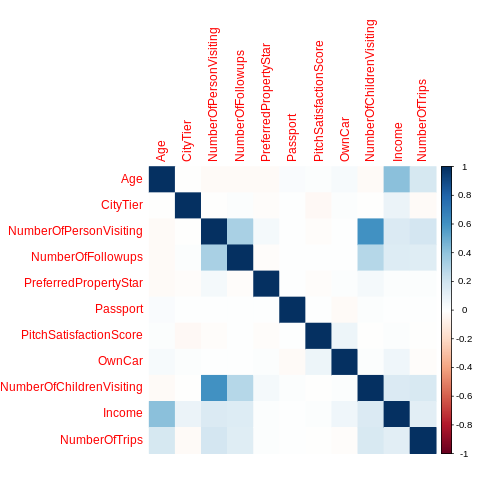

In [90]:
%%R
# Specify the output folder
task_number <- 2
ca_output_path <- generate_output_path(base_path, task_number)

variable_of_interest <- "NumberOfTrips"
perform_correlation_analysis(df, variable_of_interest, ca_output_path)

In [91]:
# @title Task-3
%%R
# Define a function for model development and validation with output to a file
develop_and_validate_model <- function(dataframe, output_folder) {
  # Load the dataset
  data <- dataframe[, -1]

  # Check for missing values
  summary_data <- summary(data)
  write.csv(summary_data, file.path(output_folder, "summary_data.csv"))

  # Encode categorical variables
  data$TypeofContact <- as.factor(data$TypeofContact)
  data$Occupation <- as.factor(data$Occupation)
  data$Gender <- as.factor(data$Gender)
  data$MaritalStatus <- as.factor(data$MaritalStatus)

  # Create the linear regression model
   model <- lm(NumberOfTrips ~ CityTier + NumberOfPersonVisiting + NumberOfFollowups,
              data = data)

  # Save the model summary to a text file
  model_summary <- capture.output(summary(model))
  writeLines(model_summary, file.path(output_folder, "linear_regression_model.txt"))

  # Perform ANOVA (F-test)
  anova_table <- anova(model)
  write.table(anova_table, file.path(output_folder, "anova_table.txt"))

  # Calculate VIF (Variance Inflation Factor) to check for multicollinearity
  vif_values <- vif(model)
  write.table(vif_values, file.path(output_folder, "vif_values.txt"))

  # Residual vs. Fitted Plot
  png(file.path(output_folder, "residual_vs_fitted.png"))
  plot(model, which = 1)
  dev.off()

  # Histogram of Residuals
  png(file.path(output_folder, "residual_histogram.png"))
  hist(residuals(model), main = "Residuals Histogram")
  dev.off()

  # Normality Test (Shapiro-Wilk)
  normality_test <- shapiro.test(residuals(model))
  # Extract the p-value from the normality test result
  p_value <- normality_test$p.value

  # Create a data frame to store the results
  normality_results <- data.frame(
    TestStatistic = normality_test$statistic,
    PValue = p_value,
    Method = "Shapiro-Wilk Normality Test"
  )
  # Save the results to a text file
  write.table(normality_results, file.path(output_folder, "normality_test.txt"))

  # Cook's distance
  cooks_distance <- cooks.distance(model)
  write.table(cooks_distance, file.path(output_folder, "cooks_distance.txt"))

  # T-test for two hypothetical groups (Group A and Group B)
  # Create groupA and groupB
  groupA <- data$NumberOfTrips
  groupB <- data$CityTier

  # Perform an independent two-sample t-test
  t_test_result <- t.test(groupA, groupB)

  # Extract and save the relevant information
  result_summary <- data.frame(
    Statistic = t_test_result$statistic,
    DegreesOfFreedom = t_test_result$parameter,
    PValue = t_test_result$p.value,
    Method = t_test_result$method
  )

  # Write the summary to a file
  write.table(result_summary, file.path(output_folder, "t_test_result.txt"))

  # Leverage and influence measures
  leverage_plot <- influenceIndexPlot(model)
  pdf(file.path(output_folder, "leverage_plot.pdf"))
  png(file.path(output_folder, "leverage_plot.png"))
  # print(leverage_plot)
  dev.off()

}


png 
  2 


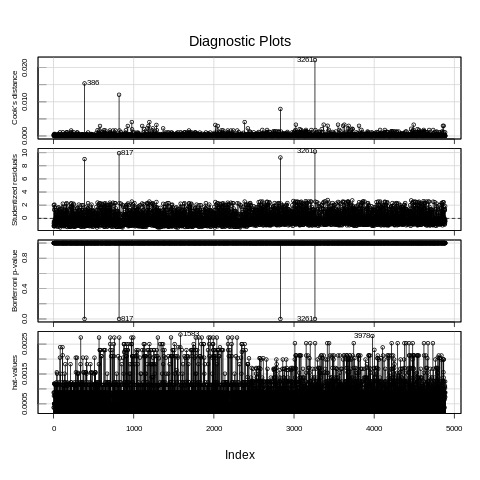

In [92]:
%%R
# Specify the output folder
task_number <- 3
mdl_output_path <- generate_output_path(base_path, task_number)

develop_and_validate_model(df, mdl_output_path)

In [93]:
# @title Task-4
%%R
# Define a function for interpreting and summarizing the linear regression model with output to a file
interpret_regression_model <- function(dataframe, predictor_variables, output_folder) {
  # Develop the linear regression model
  model <- lm(NumberOfTrips ~ ., data = dataframe[, c("NumberOfTrips", predictor_variables)])

  # Obtain model summary
  model_summary <- summary(model)

  # Save the model summary to a text file
  model_summary_file <- file.path(output_folder, "model_summary.txt")

  # Check if the file exists and remove it if it does
  if (file.exists(model_summary_file)) {
    file.remove(model_summary_file)
  }

  capture.output(print(model_summary), file = model_summary_file)

  # Return the model summary
  return(model_summary)
}


In [94]:
%%R
task_number <- 4
lrm_output_path <- generate_output_path(base_path, task_number)

predictor_variables <- c("CityTier", "Income")
model_summary <- interpret_regression_model(df, predictor_variables, lrm_output_path)
print(model_summary)


Call:
lm(formula = NumberOfTrips ~ ., data = dataframe[, c("NumberOfTrips", 
    predictor_variables)])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3580 -1.2304 -0.3191  0.9421 18.5495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.169e+00  1.524e-01  14.225   <2e-16 ***
CityTier    -7.687e-02  3.046e-02  -2.524   0.0116 *  
Income       5.337e-05  6.294e-06   8.479   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.836 on 4279 degrees of freedom
Multiple R-squared:  0.01729,	Adjusted R-squared:  0.01683 
F-statistic: 37.65 on 2 and 4279 DF,  p-value: < 2.2e-16



In [96]:
# @title Task-5
%%R
# Define a function for making predictions using a linear regression model
make_predictions <- function(model, dataframe, test_dataset_path, output_csv_file, sheet_number) {
  # Load the test data from the specified sheet number
  data <- dataframe[, -1]
  test_data <- read_excel(test_dataset_path, sheet = sheet_number)

  # Encode categorical variables (if needed)
  test_data$TypeofContact <- as.factor(test_data$TypeofContact)
  test_data$Occupation <- as.factor(test_data$Occupation)
  test_data$Gender <- as.factor(test_data$Gender)
  test_data$MaritalStatus <- as.factor(test_data$MaritalStatus)

  # Make predictions
  predictions <- predict(model, newdata = test_data)

  # Create a data frame with predictions
  prediction_df <- data.frame(Case = test_data$Case, PredictedNumberOfTrips = predictions)

  # Check if the output file already exists and remove it if it does
  if (file.exists(output_csv_file)) {
    file.remove(output_csv_file)
  }

  # Save predictions to a CSV file
  write.csv(prediction_df, file = output_csv_file, row.names = FALSE)

}


In [98]:
%%R
task_number <- 5
sheet_number <- 2
prediction_output_path <- generate_output_path(base_path, task_number)
output_csv_file <- file.path(prediction_output_path, "predictions.csv")
test_scenario_path <- "/content/drive/MyDrive/colab/dataset/M32082_dataset.xlsx"

# Call the predictions function
model <- lm(NumberOfTrips ~ CityTier + NumberOfPersonVisiting + NumberOfFollowups, data = data)
make_predictions(model, df, test_scenario_path, output_csv_file, sheet_number)